In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import keras
import random

In [22]:
#Data is imported as csv file to Dataframe
defdir="D:/Mobile proje/alllar"
os.chdir(defdir)
all_=pd.read_csv("all.csv")

In [6]:
all_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

Text(0.5, 1.0, 'Number of None-Empty Rows for Each Feature')

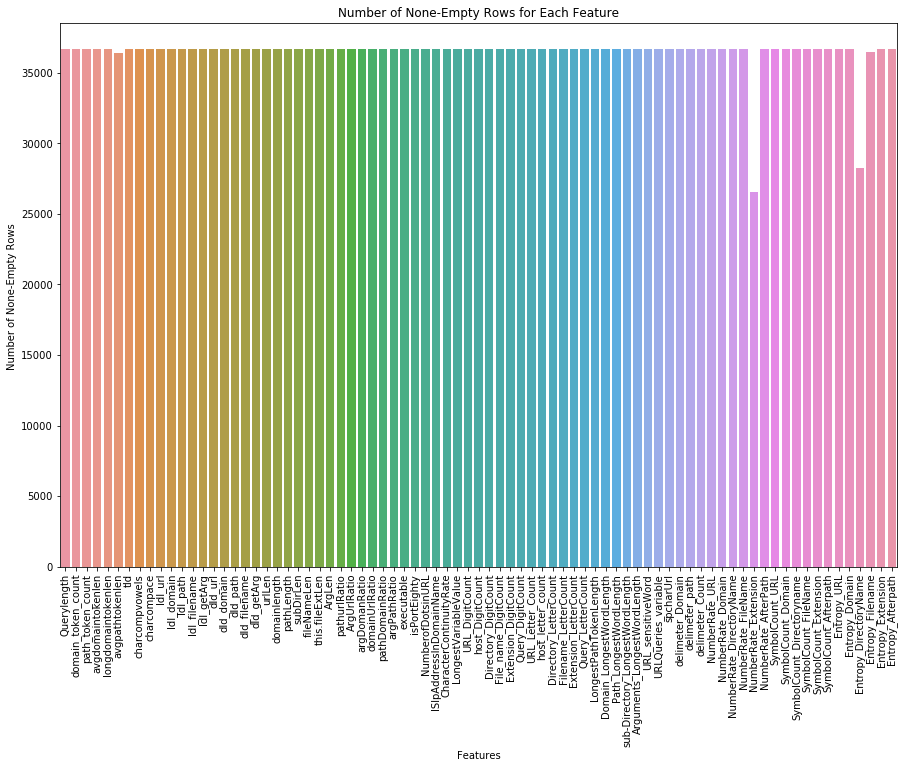

In [3]:
b=all_.describe()
c=b.iloc[0,:]
a=b.columns
c=pd.DataFrame(c)
c=c.iloc[:,0]
plt.figure(figsize=(15,10))
sns.barplot(x=a, y=c)
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Number of None-Empty Rows ')
plt.title('Number of None-Empty Rows for Each Feature')

In [23]:
#Useless Features are eliminated
all_.drop(columns=['Entropy_DirectoryName', 'NumberRate_Extension', 'argPathRatio'],inplace=True)

In [24]:
#Nan-Values replaced with mean values
all_.fillna(all_.Entropy_Extension.mean(),inplace=True)
all_.fillna(all_.mean(),inplace=True)

Text(0.5, 1.0, 'Number of None-Empty Rows for Each Feature')

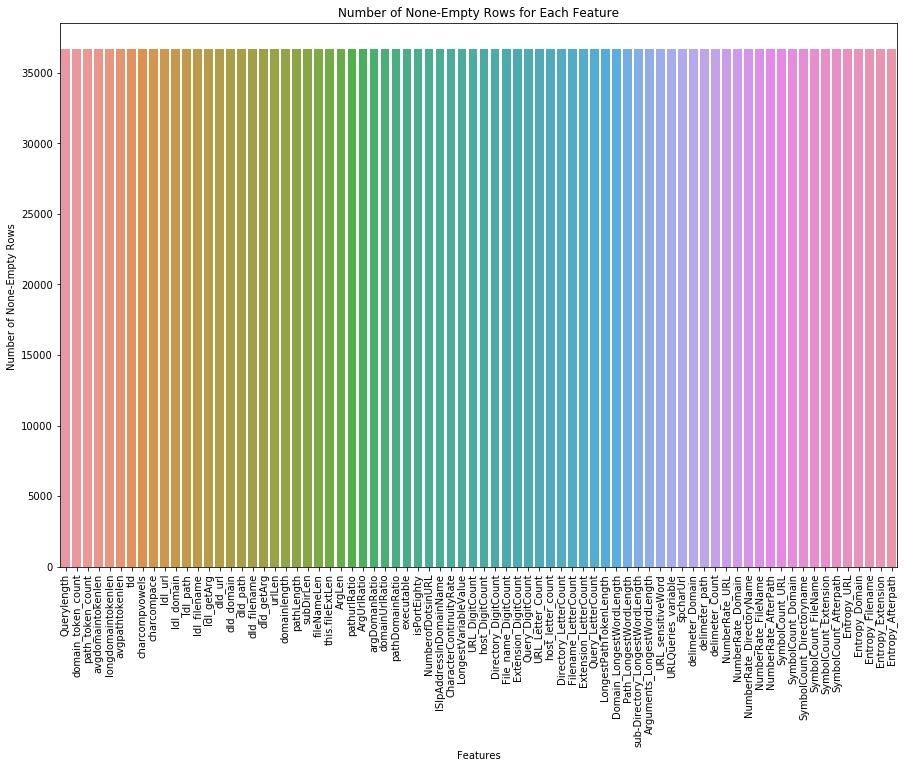

In [6]:
b=all_.describe()
c=b.iloc[0,:]
a=b.columns
c=pd.DataFrame(c)
c=c.iloc[:,0]
plt.figure(figsize=(15,10))
sns.barplot(x=a, y=c)
plt.xticks(rotation= 90)
plt.xlabel('Features')
plt.ylabel('Number of None-Empty Rows ')
plt.title('Number of None-Empty Rows for Each Feature')

Text(0.5, 1.0, 'URL Types Table')

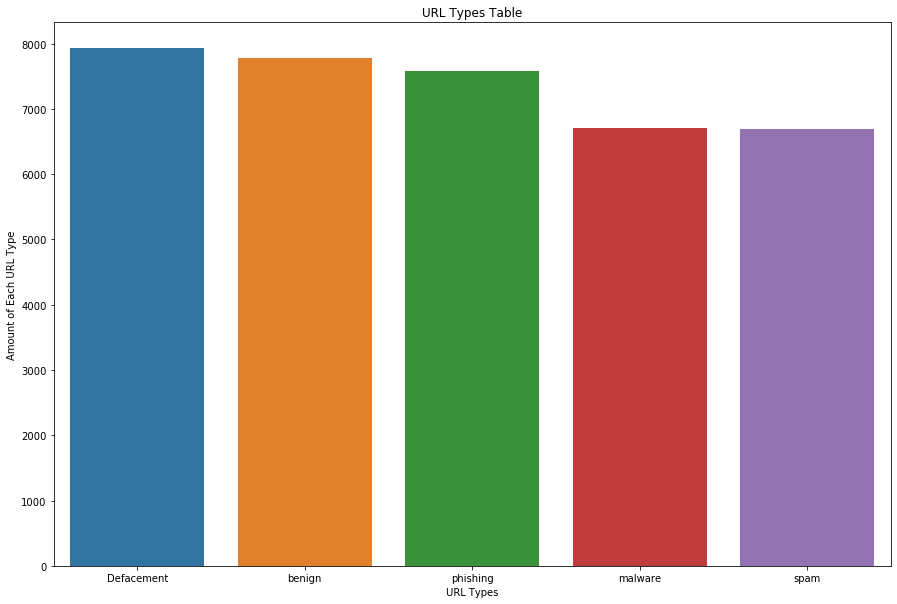

In [25]:
aaa=all_["URL_Type_obf_Type"].value_counts()
plt.figure(figsize=(15,10))
ax= sns.barplot(x=aaa.index, y=aaa[:])
plt.xlabel('URL Types')
plt.ylabel('Amount of Each URL Type')
plt.title('URL Types Table')

In [28]:
target_cate

,Defacement,benign,malware,phishing,spam
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
36702,0.0,0.0,0.0,0.0,1.0
36703,0.0,0.0,0.0,0.0,1.0
36704,0.0,0.0,0.0,0.0,1.0
36705,0.0,0.0,0.0,0.0,1.0


In [6]:
#Class Names are encoded in two different formats 
target=all_.loc[:,"URL_Type_obf_Type"]
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
target_label = enc.fit_transform(target)
from keras.utils import to_categorical
target_cate = to_categorical(target_label)


In [7]:
#numpy to Dataframe conversion
target_cate = pd.DataFrame(target_cate)
target_label = pd.DataFrame(target_label)

In [29]:
# renaming classes
target_cate.rename(columns={0:'Defacement',
                          1:'benign',
                          2:'malware',3:'phishing',4:'spam'}, 
                 inplace=True)

In [30]:
#Orginal Target Labels are replaced with One-Hot-Encoding Target Labels
all_.drop(columns=['URL_Type_obf_Type'],inplace=True)
all_["Defacement"]=target_cate["Defacement"]
all_["benign"]=target_cate["benign"]
all_["malware"]=target_cate["malware"]
all_["phishing"]=target_cate["phishing"]
all_["spam"]=target_cate["spam"]

In [12]:
b=all_.corr()
b=b.loc[["Defacement","benign","malware","phishing","spam"],:]


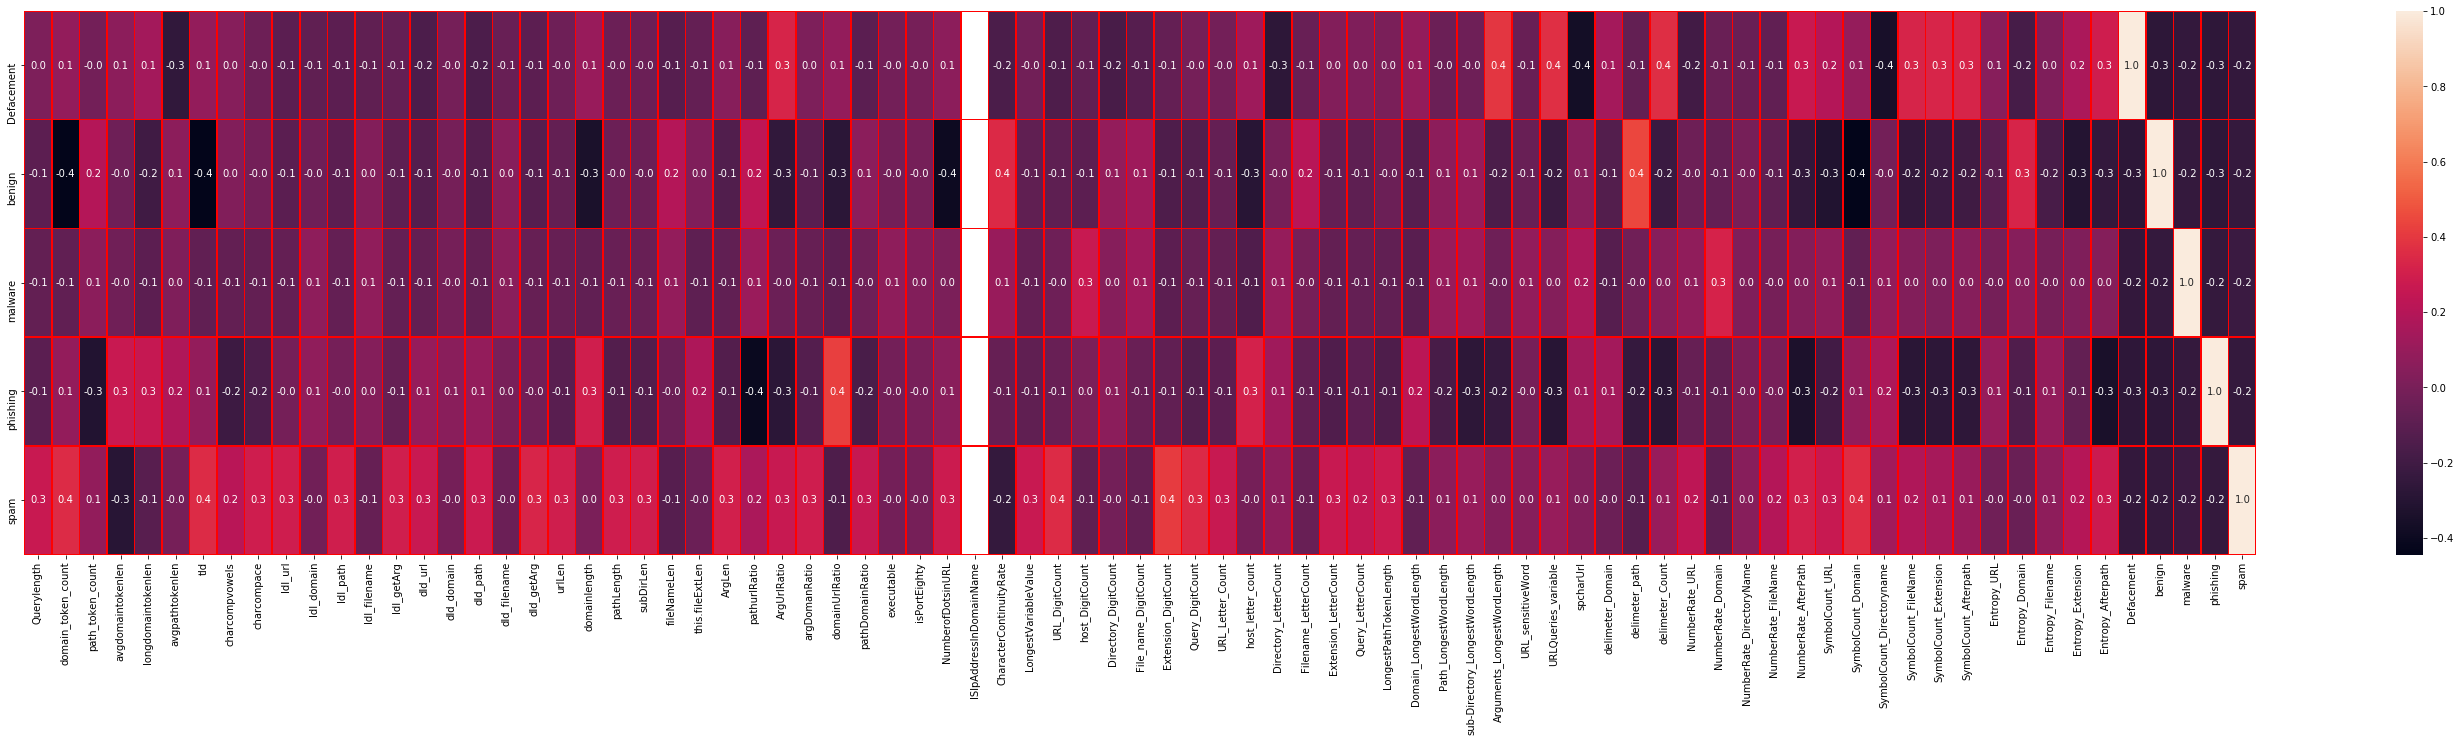

In [13]:
#correlation matrix is extracted 
f,ax = plt.subplots(figsize=(50, 10))
sns.heatmap(b, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [12]:
all_.tail(100)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,Entropy_URL,Entropy_Domain,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,Defacement,benign,malware,phishing,spam
36607,9,3,8,2.666667,4,5.166666,3,12,11,0,...,0.694218,0.879588,0.795418,0.893417,0.924957,0.0,0.0,0.0,0.0,1.0
36608,0,3,8,2.666667,4,4.125000,3,8,5,0,...,0.747232,0.879588,0.862184,0.875000,-1.000000,0.0,0.0,0.0,0.0,1.0
36609,0,4,3,7.250000,12,4.000000,4,3,3,1,...,0.780851,0.796692,0.958425,1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
36610,3,4,9,4.000000,7,3.800000,4,9,10,0,...,0.770675,0.807835,0.916667,0.000000,0.898227,0.0,0.0,0.0,0.0,1.0
36611,849,3,6,4.333334,9,2.500000,3,96,85,125,...,0.578298,0.863489,0.576876,0.576187,0.575277,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,0.690555,0.791265,0.690227,0.656684,0.796205,0.0,0.0,0.0,0.0,1.0
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,0.665492,0.820010,0.674400,0.674671,-1.000000,0.0,0.0,0.0,0.0,1.0
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,0.656807,0.801139,0.713622,0.717187,0.705245,0.0,0.0,0.0,0.0,1.0
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,0.725963,0.897617,0.745932,0.758824,0.790772,0.0,0.0,0.0,0.0,1.0


In [11]:
all_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 84 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36707 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [31]:
Y=all_.iloc[:,76:]
X=all_.iloc[:,:76]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,target_cate.values,test_size=0.2,random_state=4, shuffle=True)
#X2_train, X_valid, y2_train,y_valid = train_test_split(X_train,y_train,test_size=0.25,random_state=4, shuffle=True)

list_=[]

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout,Input, BatchNormalization, MaxPooling2D,AveragePooling2D,GlobalMaxPooling2D
def get_model( no_outputs):
    m = Sequential()
    m.add(Input(shape=(76)))
    m.add(Dense(76,activation='tanh'))
    m.add(Dense(76,activation='tanh'))
    m.add(Dense((no_outputs), activation="sigmoid"))
    print(m.summary())
    return m

m=get_model(5)

In [17]:
m=get_model(5)
#X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)
steps = int(X_train.shape[0] / 64)

m.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics=["accuracy"])
history=m.fit(X_train, y_train, batch_size=100,epochs=3000, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 76)                5852      
_________________________________________________________________
dense_4 (Dense)              (None, 76)                5852      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 385       
Total params: 12,089
Trainable params: 12,089
Non-trainable params: 0
_________________________________________________________________
None
(29365, 76)
(7342, 76)
Train on 29365 samples, validate on 7342 samples
Epoch 1/3000
29365/29365 [==============================] - 3s 113us/sample - loss: 0.0936 - accuracy: 0.6856 - val_loss: 0.0643 - val_accuracy: 0.7882
Epoch 2/3000
29365/29365 [==============================] - 1s 46us/sample - loss: 0.0566 - accuracy: 0.8198 - val_loss: 0.0481 - val_accuracy: 0.8481


KeyboardInterrupt: 

In [ ]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import accuracy_score
predictions=NN.forward(X_test)
print(accuracy_score(y_test, predictions, normalize=True))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,target_cate.values,test_size=0.2,random_state=4, shuffle=True)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.T
y_test=y_test.T


In [21]:
a=np.random.randn(76,76)

In [11]:
#v7
from sklearn.metrics import accuracy_score
class Neural_Network():   
    def __init__(self,X_train,y_train,Number_Dense1,Number_Dense2,learning_rate,batch):
        self.X_train=X_train
        self.y_train=y_train
        self.Number_Dense1=Number_Dense1 #76
        self.Number_Dense2=Number_Dense2 #76
        self.parameters={}
        self.Adam_parameters={}
        self.catch={}
        self.grads={}
        self.learning_rate=learning_rate
        self.batch=batch        

    
    
 
    def initialize_parameters_and_layer_sizes_NN(self):
        parameters={"weight1":np.random.randn(self.Number_Dense1,self.X_train.shape[0])*0.01,
                    "bias1":np.zeros((self.Number_Dense1,1)),
                    "weight2":np.random.randn(self.Number_Dense2,self.Number_Dense1)*0.01,
                    "bias2":np.zeros((self.Number_Dense2,1)),
                    "weight3":np.random.randn(self.y_train.shape[0],self.Number_Dense2)*0.01,
                    "bias3":np.zeros((self.y_train.shape[0],1))       
        }
        self.parameters=parameters
        
    def initialize_parameters_Adam_NN(self):        
        parameters={"weight1_vdw":np.zeros((self.Number_Dense1,self.X_train.shape[0])),
                    "bias1_vdw":np.zeros((self.Number_Dense1,1)),
                    "weight2_vdw":np.zeros((self.Number_Dense2,self.Number_Dense1)),
                    "bias2_vdw":np.zeros((self.Number_Dense2,1)),
                    "weight3_vdw":np.zeros((self.y_train.shape[0],self.Number_Dense2)),
                    "bias3_vdw":np.zeros((self.y_train.shape[0],1)),
                    "weight1_sdw":np.zeros((self.Number_Dense1,self.X_train.shape[0])),
                    "bias1_sdw":np.zeros((self.Number_Dense1,1)),
                    "weight2_sdw":np.zeros((self.Number_Dense2,self.Number_Dense1)),
                    "bias2_sdw":np.zeros((self.Number_Dense2,1)),
                    "weight3_sdw":np.zeros((self.y_train.shape[0],self.Number_Dense2)),
                    "bias3_sdw":np.zeros((self.y_train.shape[0],1))       
        }
        self.Adam_parameters=parameters      
        
        
        
        
    def Adam_optimizer(self,vdw,epoch,sdw,DW,w,learningRate,epsilon = np.array([pow(10, -8)])):                  
        vdw = 0.9 * vdw + (0.1) * DW
        sdw = 0.999 * sdw + (0.001) * pow(DW, 2)
        vdw_corrected = vdw / (1-pow(0.9, epoch+1))
        sdw_corrected = sdw / (1-pow(0.999,epoch+1))
        w = w + learningRate * (vdw_corrected / (np.sqrt(sdw_corrected) + epsilon)) #- değiştir
        return w,vdw,sdw

        
    def compute_cost(self,AL, Y): 
        m = Y.shape[1]
        logprobs = np.multiply(np.log(AL),Y) +  np.multiply(np.log(1-AL), (1-Y))
        cost = -1/m*np.sum(logprobs)
        cost = np.squeeze(cost)
        return cost

        
    def sigmoid(self,s):
        return 1/(1+np.exp(-s))
        
    def sigmoidPrime(self,s):
        return s*(1-s)
    
    def der_tanh(self,X):       
        return 1-(np.tanh(X)**2)
    
 

    def forward_propagation_NN(self,X_train):
        Z1=np.dot(self.parameters["weight1"],X_train)+self.parameters["bias1"]
        A1=np.tanh(Z1)
        Z2=np.dot(self.parameters["weight2"],A1)+self.parameters["bias2"]
        A2=np.tanh(Z2)
        Z3=np.dot(self.parameters["weight3"],A2)+self.parameters["bias3"]       
        A3=self.sigmoid(Z3)
    

        self.cache={
            "A1":A1,
            "A2":A2,
            "A3":A3,
            "Z1":Z1,
            "Z2":Z2,
            "Z3":Z3}
        return A3
    




    
 

        
    def backward_propagation_NN(self,X,Y):
        error=self.compute_cost(self.cache["A3"],Y)
        DW3_prime=(self.cache["A3"]-Y)*self.sigmoidPrime(self.cache["Z3"]) #DZ
        DW3=np.dot(DW3_prime,self.cache["A2"].T)/self.cache["A3"].shape[1]
        db3=np.sum(DW3_prime,axis=1,keepdims=True)/self.cache["A3"].shape[1]



        
        DW2_prime=(np.dot(self.parameters["weight3"].T,DW3_prime)*self.der_tanh(self.cache["Z2"]))#76*1000 =
        DW2=np.dot(DW2_prime,self.cache["A1"].T)/self.cache["A2"].shape[1] #DW2=76*76=    76*1000,1000*76
        db2=np.sum(DW2_prime,axis=1,keepdims=True)/self.cache["A2"].shape[1]

        
        
        DW1_prime=np.dot(self.parameters["weight2"].T,DW2_prime)*self.der_tanh(self.cache["Z1"])
        DW1=np.dot(DW1_prime,X.T)/self.cache["A1"].shape[1]
        db1=np.sum(DW1_prime,axis=1,keepdims=True)/self.cache["A1"].shape[1]



        
        self.grads={ "dweight1":DW1,
              "dbias1":db1,
              "dweight2":DW2,
              "dbias2":db2,
              "dweight3":DW3,
              "dbias3":db3}
        return error
        
            
    
 
    def Adam_update_parameters_NN(self,epoch):                      
        self.parameters["weight1"],self.Adam_parameters["weight1_vdw"],self.Adam_parameters["weight1_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight1_vdw"],epoch,self.Adam_parameters["weight1_sdw"],self.grads["dweight1"],self.parameters["weight1"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias1"],self.Adam_parameters["bias1_vdw"],self.Adam_parameters["bias1_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias1_vdw"],epoch,self.Adam_parameters["bias1_sdw"],self.grads["dbias1"],self.parameters["bias1"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["weight2"],self.Adam_parameters["weight2_vdw"],self.Adam_parameters["weight2_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight2_vdw"],epoch,self.Adam_parameters["weight2_sdw"],self.grads["dweight2"],self.parameters["weight2"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias2"],self.Adam_parameters["bias2_vdw"],self.Adam_parameters["bias2_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias2_vdw"],epoch,self.Adam_parameters["bias2_sdw"],self.grads["dbias2"],self.parameters["bias2"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["weight3"],self.Adam_parameters["weight3_vdw"],self.Adam_parameters["weight3_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight3_vdw"],epoch,self.Adam_parameters["weight3_sdw"],self.grads["dweight3"],self.parameters["weight3"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias3"],self.Adam_parameters["bias3_vdw"],self.Adam_parameters["bias3_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias3_vdw"],epoch,self.Adam_parameters["bias3_sdw"],self.grads["dbias3"],self.parameters["bias3"],self.learning_rate,np.array([pow(10, -8)]))
                      
        
        
 
    def train(self,X,y,epoch,X_test,y_test):
        
        self.initialize_parameters_and_layer_sizes_NN()
        self.initialize_parameters_Adam_NN()
        step_number=int(X.shape[1]/self.batch)
        i1=0
        for i1 in range(epoch):
            i=0
            if i1>0:
                #print("Epoch number: "+str(i1)+"/"+str(epoch)+ "step_number: "+str(i)+"/"+str(step_number),"cost: ",error,"accuracy: ",accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True))
                print("Epoch number: "+str(i1)+"/"+str(epoch)+ "step_number: "+str(i)+"/"+str(step_number),"Accuracy: ",accuracy_score(self.forward_propagation_NN(X).argmax(axis=0), y.argmax(axis=0), normalize=True),"Loss: ",error,"Val_accuracy: ",accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True),"Val_cost: ",error,"Val_accuracy: ",accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True),"Val_Acc: ",self.compute_cost(self.forward_propagation_NN(X_test),y_test))

            for i in range(step_number):
                self.forward_propagation_NN((X[:,i*self.batch:(i+1)*self.batch]))
                error=self.backward_propagation_NN(X[:,i*self.batch:(i+1)*self.batch],y[:,i*self.batch:(i+1)*self.batch])
                self.Adam_update_parameters_NN(i1)
        #return accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True),error
        
            
            

In [ ]:
print("Epoch number: "+str(i1)+"/"+str(epoch)+ "step_number: "+str(i)+"/"+str(step_number),"Accuracy: ",accuracy_score(self.forward_propagation_NN(X).argmax(axis=0), y.argmax(axis=0), normalize=True),"Loss: ",error,"Val_accuracy: ",accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True),"Val_cost: ",error,"Val_accuracy: ",accuracy_score(self.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True),"Val_Acc: ",self.compute_cost(self.forward_propagation_NN(X_test),y_test))


In [15]:
NN= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
NN.train(X_train,y_train,10000,X_test,y_test)


Epoch number: 1/10000step_number: 0/29 Accuracy:  0.181474544525796 Loss:  3.4143718042048024 Val_accuracy:  0.18836829201852356 Val_cost:  3.4143718042048024 Val_accuracy:  0.18836829201852356 Val_Acc:  3.4117906512814793
Epoch number: 2/10000step_number: 0/29 Accuracy:  0.181474544525796 Loss:  3.544751461202138 Val_accuracy:  0.18836829201852356 Val_cost:  3.544751461202138 Val_accuracy:  0.18836829201852356 Val_Acc:  3.543410625771069
Epoch number: 3/10000step_number: 0/29 Accuracy:  0.181474544525796 Loss:  3.7438728478783916 Val_accuracy:  0.18836829201852356 Val_cost:  3.7438728478783916 Val_accuracy:  0.18836829201852356 Val_Acc:  3.736350311776874
Epoch number: 4/10000step_number: 0/29 Accuracy:  0.181474544525796 Loss:  3.8276962268322317 Val_accuracy:  0.18836829201852356 Val_cost:  3.8276962268322317 Val_accuracy:  0.18836829201852356 Val_Acc:  3.814135971297681
Epoch number: 5/10000step_number: 0/29 Accuracy:  0.181474544525796 Loss:  3.8311268057618304 Val_accuracy:  0.18

C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


Epoch number: 2451/10000step_number: 0/29 Accuracy:  0.9182359952324195 Loss:  1.3450890699737774 Val_accuracy:  0.9039771179515118 Val_cost:  1.3450890699737774 Val_accuracy:  0.9039771179515118 Val_Acc:  1.552921092552804
Epoch number: 2452/10000step_number: 0/29 Accuracy:  0.9180997786480504 Loss:  1.345046009167702 Val_accuracy:  0.9039771179515118 Val_cost:  1.345046009167702 Val_accuracy:  0.9039771179515118 Val_Acc:  1.5528910051936522
Epoch number: 2453/10000step_number: 0/29 Accuracy:  0.9180997786480504 Loss:  1.3450074801183953 Val_accuracy:  0.9037047126123672 Val_cost:  1.3450074801183953 Val_accuracy:  0.9037047126123672 Val_Acc:  1.5528592651629205
Epoch number: 2454/10000step_number: 0/29 Accuracy:  0.9180316703558659 Loss:  1.344974097900086 Val_accuracy:  0.9039771179515118 Val_cost:  1.344974097900086 Val_accuracy:  0.9039771179515118 Val_Acc:  1.5528273090420368
Epoch number: 2455/10000step_number: 0/29 Accuracy:  0.9180657245019581 Loss:  1.344946296128211 Val_accu

KeyboardInterrupt: 

In [13]:
NN= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
NN.train(X_train,y_train,10000,X_test,y_test)


Epoch number: 1/10000step_number: 0/29 cost:  3.1367721370291965 accuracy:  0.21520021792427133
Epoch number: 2/10000step_number: 0/29 cost:  2.7639655406763404 accuracy:  0.21520021792427133
Epoch number: 3/10000step_number: 0/29 cost:  2.5900575564862667 accuracy:  0.21520021792427133
Epoch number: 4/10000step_number: 0/29 cost:  2.5287090822506353 accuracy:  0.21520021792427133
Epoch number: 5/10000step_number: 0/29 cost:  2.5085355893069736 accuracy:  0.21520021792427133
Epoch number: 6/10000step_number: 0/29 cost:  2.5019577540073508 accuracy:  0.21520021792427133
Epoch number: 7/10000step_number: 0/29 cost:  2.4998311178015973 accuracy:  0.21520021792427133
Epoch number: 8/10000step_number: 0/29 cost:  2.4991404234304113 accuracy:  0.2094797058022337
Epoch number: 9/10000step_number: 0/29 cost:  2.4989105678282475 accuracy:  0.2094797058022337
Epoch number: 10/10000step_number: 0/29 cost:  2.498830602839086 accuracy:  0.2094797058022337
Epoch number: 11/10000step_number: 0/29 cos

C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in log
C:\Users\Burak\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in multiply


Epoch number: 3492/10000step_number: 0/29 cost:  0.13700160856437252 accuracy:  0.9505584309452465
Epoch number: 3493/10000step_number: 0/29 cost:  0.13692795415407744 accuracy:  0.9505584309452465
Epoch number: 3494/10000step_number: 0/29 cost:  0.1368541105378845 accuracy:  0.9505584309452465
Epoch number: 3495/10000step_number: 0/29 cost:  0.136780095012267 accuracy:  0.9504222282756742
Epoch number: 3496/10000step_number: 0/29 cost:  0.13670592190678266 accuracy:  0.9504222282756742
Epoch number: 3497/10000step_number: 0/29 cost:  0.13663159861790738 accuracy:  0.9504222282756742
Epoch number: 3498/10000step_number: 0/29 cost:  0.13655712145173748 accuracy:  0.9504222282756742
Epoch number: 3499/10000step_number: 0/29 cost:  0.13648247188722923 accuracy:  0.9505584309452465
Epoch number: 3500/10000step_number: 0/29 cost:  0.13640761429882378 accuracy:  0.9505584309452465
Epoch number: 3501/10000step_number: 0/29 cost:  0.13633249664660269 accuracy:  0.9506946336148189
Epoch number:

In [46]:
#en önemldi model bu Epoch number: 1514/10000step_number: 0/29 cost:  0.26443569248700066 accuracy:  0.9346227186052847 , V7
NN= Neural_Network(X_train,y_train,76,76,0.0001,1000)
NN.train(X_train,y_train,10000,X_test,y_test)



Epoch number: 1/10000step_number: 0/29 cost:  3.1753539356116462 accuracy:  0.18033233451375646
Epoch number: 2/10000step_number: 0/29 cost:  2.8010628229428387 accuracy:  0.18033233451375646
Epoch number: 3/10000step_number: 0/29 cost:  2.6165244161342507 accuracy:  0.18033233451375646
Epoch number: 4/10000step_number: 0/29 cost:  2.5467740236036134 accuracy:  0.18033233451375646
Epoch number: 5/10000step_number: 0/29 cost:  2.520402845828965 accuracy:  0.18033233451375646
Epoch number: 6/10000step_number: 0/29 cost:  2.5091742458132114 accuracy:  0.18033233451375646
Epoch number: 7/10000step_number: 0/29 cost:  2.5039285246017142 accuracy:  0.2094797058022337
Epoch number: 8/10000step_number: 0/29 cost:  2.5013771850859894 accuracy:  0.2094797058022337
Epoch number: 9/10000step_number: 0/29 cost:  2.50011213091843 accuracy:  0.2094797058022337
Epoch number: 10/10000step_number: 0/29 cost:  2.499472639205354 accuracy:  0.2094797058022337
Epoch number: 11/10000step_number: 0/29 cost:  

KeyboardInterrupt: 

In [52]:
#v8
from sklearn.metrics import accuracy_score
class Neural_Network():   
    def __init__(self,X_train,y_train,Number_Dense1,Number_Dense2,learning_rate,batch):
        self.X_train=X_train
        self.y_train=y_train
        self.Number_Dense1=Number_Dense1
        self.Number_Dense2=Number_Dense2
        self.parameters={}
        self.Adam_parameters={}
        self.catch={}
        self.grads={}
        self.learning_rate=learning_rate
        self.batch=batch
        

        
    def linear_forward(self,A, W, b):
        
        Z = np.dot(W, A) + b
        cache = (A, W, b)    
        return Z, cache
    
    
    def linear_activation_forward(self,A_prev, W, b, activation):       
        if activation == "sigmoid":
            Z, linear_cache  = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.sigmoid(Z)
        elif activation == "relu":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = self.relu(Z)
        cache = (linear_cache, activation_cache)
        return A, cache
      
        print(X_train.shape[0])
    def initialize_parameters_and_layer_sizes_NN(self):
        parameters={"weight1":np.random.randn(self.Number_Dense1,self.X_train.shape[0])*0.01,
                    "bias1":np.zeros((self.Number_Dense1,1)),
                    "weight2":np.random.randn(self.Number_Dense2,self.Number_Dense1)*0.01,
                    "bias2":np.zeros((self.Number_Dense2,1)),
                    "weight3":np.random.randn(self.y_train.shape[0],self.Number_Dense2)*0.01,
                    "bias3":np.zeros((self.y_train.shape[0],1))       
        }
        self.parameters=parameters
        
    def initialize_parameters_Adam_NN(self):        
        parameters={"weight1_vdw":np.zeros((self.Number_Dense1,self.X_train.shape[0])),
                    "bias1_vdw":np.zeros((self.Number_Dense1,1)),
                    "weight2_vdw":np.zeros((self.Number_Dense2,self.Number_Dense1)),
                    "bias2_vdw":np.zeros((self.Number_Dense2,1)),
                    "weight3_vdw":np.zeros((self.y_train.shape[0],self.Number_Dense2)),
                    "bias3_vdw":np.zeros((self.y_train.shape[0],1)),
                    "weight1_sdw":np.zeros((self.Number_Dense1,self.X_train.shape[0])),
                    "bias1_sdw":np.zeros((self.Number_Dense1,1)),
                    "weight2_sdw":np.zeros((self.Number_Dense2,self.Number_Dense1)),
                    "bias2_sdw":np.zeros((self.Number_Dense2,1)),
                    "weight3_sdw":np.zeros((self.y_train.shape[0],self.Number_Dense2)),
                    "bias3_sdw":np.zeros((self.y_train.shape[0],1))       
        }
        self.Adam_parameters=parameters
        
        
        
        
        
    def Adam_optimizer(self,vdw,epoch,sdw,DW,w,learningRate,epsilon = np.array([pow(10, -8)])):                  
        vdw = 0.9 * vdw + (0.1) * DW
        sdw = 0.999 * sdw + (0.001) * pow(DW, 2)
        vdw_corrected = vdw / (1-pow(0.9, epoch+1))
        sdw_corrected = sdw / (1-pow(0.999,epoch+1))
        w = w + learningRate * (vdw_corrected / (np.sqrt(sdw_corrected) + epsilon)) #- değiştir
        return w,vdw,sdw

        
    def compute_cost(self,AL, Y): 
        m = Y.shape[1]
        logprobs = np.multiply(np.log(AL),Y) +  np.multiply(np.log(1-AL), (1-Y))
        cost = -1/m*np.sum(logprobs)
        cost = np.squeeze(cost)
        return cost

        
    def Relu(self,x):
        for i in range(x.shape[0]):
            for i1 in range(x.shape[1]):
                if x[i,i1]<0:
                    x[i,i1]=0

        return x
    
    def ReluPrime(self,x):
        for i in range(x.shape[0]):
            for i1 in range(x.shape[1]):
                if(x[i,i1]<0):
                     x[i,i1]*=0
                else:
                    x[i,i1]*=1
                
        return x
    def stable_softmax(self,X):        
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps)
    def der_tanh(self,X):       
        return 1-(np.tanh(X)**2)
    
    def cross_entropy_loss(self,Y,A3):
        E=np.zeros(Y.shape)
        
        for i in range(Y.shape[0]):
            for i1 in range(Y.shape[1]):
                if int(Y[i,i1])==1:
                    E[i,i1]=-np.log(A3[i,i1])
                else:
                    E[i,i1]=-np.log(1-A3[i,i1])
        
    
        return np.sum(E)

    def forward_propagation_NN(self,X_train):
        Z1=np.dot(self.parameters["weight1"],X_train)+self.parameters["bias1"]
        A1=np.tanh(Z1)
        Z2=np.dot(self.parameters["weight2"],A1)+self.parameters["bias2"]
        A2=np.tanh(Z2)
        Z3=np.dot(self.parameters["weight3"],A2)+self.parameters["bias3"]       
        A3=self.softmax(Z3)
    

        self.cache={
            "A1":A1,
            "A2":A2,
            "A3":A3,
            "Z1":Z1,
            "Z2":Z2,
            "Z3":Z3}
        return A3
    
    def sigmoid(self,s):
        return 1/(1+np.exp(-s))
        
    def sigmoidPrime(self,s):
        return s*(1-s)
    



    
 

        
    def backward_propagation_NN(self,X,Y):


        error=self.compute_cost(self.cache["A3"],Y)
        DW3_prime=(self.cache["A3"]-Y) #DZ
        DW3=np.dot(DW3_prime,self.cache["A2"].T)/self.cache["A3"].shape[1]
        db3=np.sum(DW3_prime,axis=1,keepdims=True)/self.cache["A3"].shape[1]



        
        DW2_prime=(np.dot(self.parameters["weight3"].T,DW3_prime)*self.der_tanh(self.cache["Z2"]))#76*1000 =
        DW2=np.dot(DW2_prime,self.cache["A1"].T)/self.cache["A2"].shape[1] #DW2=76*76=    76*1000,1000*76
        db2=np.sum(DW2_prime,axis=1,keepdims=True)/self.cache["A2"].shape[1]

        
        
        DW1_prime=np.dot(self.parameters["weight2"].T,DW2_prime)*self.der_tanh(self.cache["Z1"])
        DW1=np.dot(DW1_prime,X.T)/self.cache["A1"].shape[1]
        db1=np.sum(DW1_prime,axis=1,keepdims=True)/self.cache["A1"].shape[1]



        
        self.grads={ "dweight1":DW1,
              "dbias1":db1,
              "dweight2":DW2,
              "dbias2":db2,
              "dweight3":DW3,
              "dbias3":db3}
        return error
        
            
    def softmax(self,X):
        exps = np.exp(X)
        return exps / np.sum(exps)

    def update_parameters_NN(self):
        parameter={"weight1":self.parameters["weight1"]-(self.learning_rate*self.grads["dweight1"]),
                "weight2":self.parameters["weight2"]-(self.learning_rate*self.grads["dweight2"]),
                   "weight3":self.parameters["weight3"]-(self.learning_rate*self.grads["dweight3"]),
                "bias1":self.parameters["bias1"]-(self.learning_rate*self.grads["dbias1"]),
                   "bias3":self.parameters["bias3"]-(self.learning_rate*self.grads["dbias3"]),
                "bias2":self.parameters["bias2"]-(self.learning_rate*self.grads["dbias2"])}
        self.parameters=parameter
        
    def Adam_update_parameters_NN(self,epoch):                      
        self.parameters["weight1"],self.Adam_parameters["weight1_vdw"],self.Adam_parameters["weight1_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight1_vdw"],epoch,self.Adam_parameters["weight1_sdw"],self.grads["dweight1"],self.parameters["weight1"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias1"],self.Adam_parameters["bias1_vdw"],self.Adam_parameters["bias1_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias1_vdw"],epoch,self.Adam_parameters["bias1_sdw"],self.grads["dbias1"],self.parameters["bias1"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["weight2"],self.Adam_parameters["weight2_vdw"],self.Adam_parameters["weight2_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight2_vdw"],epoch,self.Adam_parameters["weight2_sdw"],self.grads["dweight2"],self.parameters["weight2"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias2"],self.Adam_parameters["bias2_vdw"],self.Adam_parameters["bias2_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias2_vdw"],epoch,self.Adam_parameters["bias2_sdw"],self.grads["dbias2"],self.parameters["bias2"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["weight3"],self.Adam_parameters["weight3_vdw"],self.Adam_parameters["weight3_sdw"]=self.Adam_optimizer(self.Adam_parameters["weight3_vdw"],epoch,self.Adam_parameters["weight3_sdw"],self.grads["dweight3"],self.parameters["weight3"],self.learning_rate,np.array([pow(10, -8)]))
        self.parameters["bias3"],self.Adam_parameters["bias3_vdw"],self.Adam_parameters["bias3_sdw"]=self.Adam_optimizer(self.Adam_parameters["bias3_vdw"],epoch,self.Adam_parameters["bias3_sdw"],self.grads["dbias3"],self.parameters["bias3"],self.learning_rate,np.array([pow(10, -8)]))
                      
        
        
    def prediction_NN(self,X_test):
        
        A2=self.forward_propagation_NN(X_test)
        print(A2.shape)
        Y_prediction=np.zeros((self.batch,5))
        for i1 in range(5):
            for i in range(self.batch):
                if A2[i,i1]<=0.5:
                    Y_prediction[i1,i]=0
                else:
                    Y_prediction[i1,i]=1
        return Y_prediction
        
    def train(self,X,y,epoch,X_validation,y_validation):
        
        self.initialize_parameters_and_layer_sizes_NN()
        self.initialize_parameters_Adam_NN()
        step_number=int(X.shape[1]/self.batch)
        i1=0
        for i1 in range(epoch):
            i=0
            if i1>0:
                print("Epoch number: "+str(i1)+"/"+str(epoch)+ "step_number: "+str(i)+"/"+str(step_number),"cost: ",error,"accuracy: ",accuracy_score(NN.forward_propagation_NN(X_test).argmax(axis=0), y_test.argmax(axis=0), normalize=True))

            for i in range(step_number):
                self.forward_propagation_NN((X[:,i*self.batch:(i+1)*self.batch]))
                error=self.backward_propagation_NN(X[:,i*self.batch:(i+1)*self.batch],y[:,i*self.batch:(i+1)*self.batch])
                self.Adam_update_parameters_NN(i1)
                
        
            
            

In [17]:
import plotly
d1 = {'methods': ['KNN'],'scores':[0.795]}
df1=pd.DataFrame(d1)
d1 = {'methods': 'KNN with PCA','scores':0.791 }
df1=df1.append(d1,ignore_index=True)

d2 = {'methods': ['RFC'],'scores':[0.7532]}
df2=pd.DataFrame(d2)
d2 = {'methods': 'RFC with PCA','scores':0.7849 }
df2=df2.append(d2,ignore_index=True)

d3 = {'methods': ['SVC'],'scores':[0.611277]}
df3=pd.DataFrame(d3)
d3 = {'methods': 'SVC with PCA','scores':0.8169 }
df3=df3.append(d3,ignore_index=True)

d4 = {'methods': ['MLP_with_keras'],'scores':[0.9736]}
df4=pd.DataFrame(d4)
d4 = {'methods': 'MLP_our_library','scores':0.926
 }
df4=df4.append(d4,ignore_index=True)

# prepare data frames

# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df1.methods,
                y = df1.scores,
                name = "KNN",
                marker = dict(color = 'rgba(255, 0, 0, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df1.methods)
trace3 = go.Bar(
                x = df2.methods,
                y = df2.scores,
                name = "RFC",
                marker = dict(color = 'rgba(0, 256, 0, .8)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2.methods)
# create trace2 
trace2 = go.Bar(
                x = df3.methods,
                y = df3.scores,
                name = "SVC",
                marker = dict(color = 'rgba(0, 0, 256, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.methods)
trace4 = go.Bar(
                x = df4.methods,
                y = df4.scores,
                name = "MLP",
                marker = dict(color = 'rgba(0, 0, 100, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df4.methods)
data = [trace1,trace3, trace2,trace4]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig

In [43]:
XX=X.values
YY=target_cate.values
X_=XX
Y_=YY
a=kf.split(X_)
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5,  random_state=None)


i=0
for train_index, test_index in kf.split(X_):    
    X_train, X_test = X_[train_index], X_[test_index] 
    y_train, y_test = Y_[train_index], Y_[test_index]
    X_train=X_train.T
    X_test=X_test.T
    y_train=y_train.T
    y_test=y_test.T
    if(i%5==0):
        NN1_= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
        a1=NN1_.train(X_train,y_train,10000,X_test1,y_test1)
        i=i+1
    elif(i%5==1):
        NN2= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
        a2=NN1.train(X_train,y_train,10000,X_test1,y_test1)
        i=i+1
    elif(i%5==2):
        NN3= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
        a3=NN1.train(X_train,y_train,10000,X_test1,y_test1)
        i=i+1
    elif(i%5==3):
        NN4= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
        a4=NN1.train(X_train,y_train,10000,X_test1,y_test1)
        i=i+1
    else:
        NN5= Neural_Network(X_train,y_train,76,76,0.0001,1000) #v7
        a5=NN1.train(X_train,y_train,10000,X_test1,y_test1)
        i=i+1
print("SONUC!","cost: ",(a1[1]+a2[1]+a3[1]+a4[1]+a5[1])/5,"accuracy: ",(a1[0]+a2[0]+a3[0]+a4[0]+a5[0])/5)

Epoch number: 1/10000step_number: 0/29 cost:  3.3277505099348037 accuracy:  0.0
Epoch number: 2/10000step_number: 0/29 cost:  3.2313838878892396 accuracy:  1.0
Epoch number: 3/10000step_number: 0/29 cost:  3.173625301321641 accuracy:  1.0
Epoch number: 4/10000step_number: 0/29 cost:  3.1397287344484828 accuracy:  1.0
Epoch number: 5/10000step_number: 0/29 cost:  3.097225336306127 accuracy:  1.0
Epoch number: 6/10000step_number: 0/29 cost:  3.042629349180715 accuracy:  1.0
Epoch number: 7/10000step_number: 0/29 cost:  2.9904654970816384 accuracy:  1.0
Epoch number: 8/10000step_number: 0/29 cost:  2.9475803109788568 accuracy:  1.0
Epoch number: 9/10000step_number: 0/29 cost:  2.9132145115713994 accuracy:  1.0
Epoch number: 10/10000step_number: 0/29 cost:  2.885008671763536 accuracy:  0.0
Epoch number: 11/10000step_number: 0/29 cost:  2.8610868549652633 accuracy:  0.0
Epoch number: 12/10000step_number: 0/29 cost:  2.840230043052283 accuracy:  0.0
Epoch number: 13/10000step_number: 0/29 co

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5,  random_state=None)
NN1= Neural_Network(X_train1,y_train1,76,76,0.0001,1000) #v7
NN2= Neural_Network(X_train2,y_train2,76,76,0.0001,1000) #v7
NN3= Neural_Network(X_train3,y_train3,76,76,0.0001,1000) #v7
NN4= Neural_Network(X_train4,y_train4,76,76,0.0001,1000) #v7
NN5= Neural_Network(X_train5,y_train5,76,76,0.0001,1000) #v7
i1=0
while i1<1000:
    
    a1=NN1.train(X_train1,y_train1,10000,X_test1,y_test1)
    print(a1[0])
    a2=NN2.train(X_train2,y_train2,10000,X_test2,y_test2)
    print(a2[0])
    a3=NN3.train(X_train3,y_train3,10000,X_test3,y_test3)
    print(a3[0])
    a4=NN4.train(X_train4,y_train4,10000,X_test4,y_test4)
    print(a4[0])
    a5=NN5.train(X_train5,y_train5,10000,X_test5,y_test5)
    print(a5[0])
    print("SONUC!","cost: ",(a1[1]+a2[1]+a3[1]+a4[1]+a5[1])/5,"accuracy: ",(a1[0]+a2[0]+a3[0]+a4[0]+a5[0])/5)
    i1=i1+1

In [39]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5,  random_state=None)
NN1= Neural_Network(X_train1,y_train1,76,76,0.0001,1000) #v7
NN2= Neural_Network(X_train2,y_train2,76,76,0.0001,1000) #v7
NN3= Neural_Network(X_train3,y_train3,76,76,0.0001,1000) #v7
NN4= Neural_Network(X_train4,y_train4,76,76,0.0001,1000) #v7
NN5= Neural_Network(X_train5,y_train5,76,76,0.0001,1000) #v7
i1=0
while i1<1000:
    a1=NN1.train(X_train1,y_train1,10000,X_test1,y_test1)
    print(a1[0])
    a2=NN2.train(X_train2,y_train2,10000,X_test2,y_test2)
    print(a2[0])
    a3=NN3.train(X_train3,y_train3,10000,X_test3,y_test3)
    print(a3[0])
    a4=NN4.train(X_train4,y_train4,10000,X_test4,y_test4)
    print(a4[0])
    a5=NN5.train(X_train5,y_train5,10000,X_test5,y_test5)
    print(a5[0])
    print("Epoch number: "+str(i1)+"/"+"1000","cost: ",(a1[1]+a2[1]+a3[1]+a4[1]+a5[1])/5,"accuracy: ",(a1[0]+a2[0]+a3[0]+a4[0]+a5[0])/5)
    i1=i1+1

1.0
0.0
0.13989919629478273
0.9457839531398992
0.9124097534395859
Epoch number: 0/1000 cost:  3.5244260350216097 accuracy:  0.5996185805748535
1.0
0.0
0.0
0.9457839531398992
0.9124097534395859
Epoch number: 1/1000 cost:  3.5917065157025108 accuracy:  0.571638741315897
0.0
0.08008716970852629
0.8601008037052172
0.9457839531398992
0.08759024656041411
Epoch number: 2/1000 cost:  3.501094893939608 accuracy:  0.39471243462281136
0.0
0.9199128302914737
0.0
0.0
0.9124097534395859
Epoch number: 3/1000 cost:  3.404462107425041 accuracy:  0.3664645167462119
0.0
0.0
0.0
0.9457839531398992
0.8026154474867184
Epoch number: 4/1000 cost:  3.4857965428542053 accuracy:  0.34967988012532353
1.0
0.0
0.8601008037052172
0.9457839531398992
0.08759024656041411
Epoch number: 5/1000 cost:  3.3982771606175968 accuracy:  0.578695000681106
0.0
0.0
0.0
0.0
0.9124097534395859
Epoch number: 6/1000 cost:  3.4660290646786387 accuracy:  0.18248195068791717
0.0
0.0
0.0
0.05421604686010081
0.08759024656041411
Epoch numbe

KeyboardInterrupt: 